In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.getcwd()

'C:\\Users\\kyj23\\Desktop\\my\\practice\\python'

In [3]:
new_path=os.path.join(os.getcwd(),'data')

pathName=os.path.join(new_path,'Dataset/라벨수정')
pathName

'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정'

In [4]:
glob.glob(pathName+"/*")

['C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\Error Lot list.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.06_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.07_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.08_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.09_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.10_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.13_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.14_labeling.csv',
 'C:\\Users\\kyj23\\Desktop\\my\\practice\\python\\data\\Dataset/라벨수정\\kemp-abh-sensor-2022.09.15_labeling.csv',
 'C:

In [5]:
dataList=list()
cnt=0

for pth in glob.glob(pathName+'/*')[1:]:
    origin = pd.read_csv(pth,index_col=False)
    cnt=cnt+len(origin)
    dataList.append(origin)

CatList=pd.concat(dataList,axis=0,ignore_index=True)
CatList

,Index,Process,Time,Temp,Current,Date,Label,Unnamed: 7,Unnamed: 8
0,1,1,오후 4:24:03.0,75.139142,1.610,2022-09-06,0,NaN,NaN
1,2,1,오후 4:24:08.0,76.660421,1.530,2022-09-06,0,NaN,NaN
2,3,1,오후 4:24:13.0,77.177660,1.701,2022-09-06,0,NaN,NaN
3,4,1,오후 4:24:18.0,76.586434,1.736,2022-09-06,0,NaN,NaN
4,5,1,오후 4:24:23.0,77.877104,1.748,2022-09-06,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2022-10-27,0,NaN,NaN
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2022-10-27,0,NaN,NaN
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2022-10-27,0,NaN,NaN
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2022-10-27,0,NaN,NaN


In [13]:
df = CatList.drop([CatList.columns[7],CatList.columns[8]], axis=1)
df

,Index,Process,Time,Temp,Current,Date,Label
0,1,1,오후 4:24:03.0,75.139142,1.610,2022-09-06,0
1,2,1,오후 4:24:08.0,76.660421,1.530,2022-09-06,0
2,3,1,오후 4:24:13.0,77.177660,1.701,2022-09-06,0
3,4,1,오후 4:24:18.0,76.586434,1.736,2022-09-06,0
4,5,1,오후 4:24:23.0,77.877104,1.748,2022-09-06,0
...,...,...,...,...,...,...,...
51079,1544,43,오후 6:45:03.4,67.312474,1.560,2022-10-27,0
51080,1545,43,오후 6:45:08.4,65.533664,1.472,2022-10-27,0
51081,1546,43,오후 6:45:13.4,66.740424,1.523,2022-10-27,0
51082,1547,43,오후 6:45:18.4,68.045185,1.483,2022-10-27,0


In [15]:
df = df.drop(['Index','Process','Time','Date'], axis=1)
df

,Temp,Current,Label
0,75.139142,1.610,0
1,76.660421,1.530,0
2,77.177660,1.701,0
3,76.586434,1.736,0
4,77.877104,1.748,0
...,...,...,...
51079,67.312474,1.560,0
51080,65.533664,1.472,0
51081,66.740424,1.523,0
51082,68.045185,1.483,0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler = StandardScaler()
df_data = df.drop(['Label'], axis=1) 
df_scaled = scaler.fit_transform(df_data)
df_scaled

array([[ 0.04834502,  0.27659986],
       [ 0.16649822, -0.23033417],
       [ 0.20667061,  0.85323733],
       ...,
       [-0.60395836, -0.2746909 ],
       [-0.50262144, -0.52815792],
       [-0.46943391, -0.35073101]])

In [19]:
Y = df['Label']
X = df_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=156)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

In [23]:
confusion_matrix(Y_test, Y_predict)

array([[9399,    0],
       [   0,  818]], dtype=int64)

In [24]:
accuracy = accuracy_score(Y_test, Y_predict)
precisioin = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)
accuracy, precisioin, recall, f1, roc_auc

(1.0, 1.0, 1.0, 1.0, 1.0)

In [25]:
import matplotlib.pyplot as plt

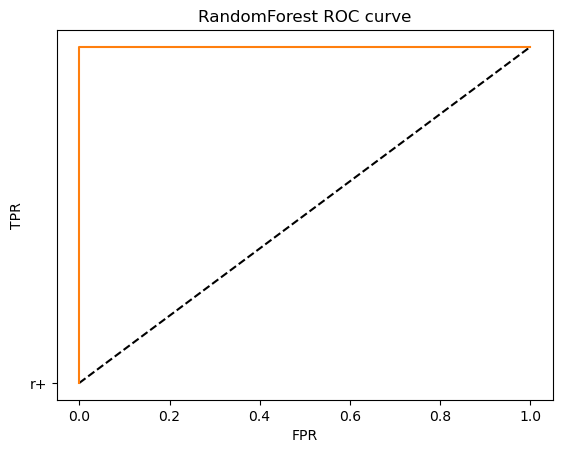

In [26]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RandomForest ROC curve')
plt.show()